In [1]:
from qaoa_rigetti import qaoa_customquil, qaoa_maxcut

In [2]:
import matplotlib.pyplot as plt

In [12]:
# Define a qaoa instance
# First n angles ar the betas and the last n are the gammas.
def qaoa_maxcut_instance(angles):
    edges = [(0,1),(1,2),(2,3)]
    return qaoa_maxcut(edges, angles)
def qaoa_maxcut_negative(angles):
    return -qaoa_maxcut_instance(angles)

In [7]:
edges = [(0,1),(1,2),(2,3)]
qaoa_maxcut(edges,[30,40,50,60])

0.291

In [22]:
qaoa_maxcut_negative([20,30])

-1.464

In [8]:
test = []
for angle in range(0,90):
    test.append(qaoa_maxcut_instance([20,30,30,angle/6]))

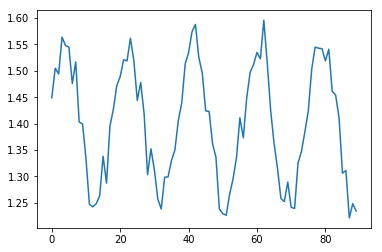

In [9]:
plt.plot(test)

In [10]:
from scipy.optimize import minimize

In [21]:
history = []
def callback(x):
    fobj = qaoa_maxcut_negative(x)
    history.append(fobj)
x0=[20,30]
res = minimize(qaoa_maxcut_negative, x0, method='nelder-mead', callback=callback, options={'disp':True})
print(history)

[-1.465, -1.497, -1.46, -1.498, -1.495, -1.471, -1.485, -1.514, -1.524, -1.48, -1.542, -1.542, -1.474, -1.533, -1.53, -1.502, -1.448, -1.506, -1.473, -1.456, -1.496, -1.493, -1.503, -1.443, -1.502, -1.513, -1.469, -1.507, -1.487, -1.508, -1.5, -1.526, -1.45, -1.504, -1.52, -1.495, -1.5, -1.511, -1.501, -1.52, -1.484, -1.495, -1.543, -1.447, -1.49, -1.533, -1.436, -1.492, -1.503, -1.526, -1.575, -1.489, -1.477, -1.536, -1.531, -1.558, -1.477, -1.449, -1.533, -1.536, -1.516, -1.494, -1.509, -1.51, -1.513, -1.52, -1.499, -1.478, -1.501, -1.483, -1.525, -1.531, -1.492, -1.521, -1.526, -1.465, -1.554, -1.503, -1.509, -1.499, -1.543, -1.49, -1.524, -1.489, -1.465, -1.518, -1.468, -1.537, -1.485, -1.513, -1.462, -1.474, -1.457, -1.495, -1.477, -1.508, -1.552, -1.472, -1.516, -1.504, -1.526, -1.489, -1.487, -1.49, -1.511, -1.522, -1.511, -1.46, -1.508, -1.513, -1.518, -1.482, -1.513, -1.498, -1.5, -1.489, -1.467, -1.504, -1.506, -1.508, -1.49, -1.538, -1.521, -1.494, -1.505, -1.483, -1.486, -1

In [9]:
from scipy.optimize import basinhopping

In [15]:
minimizer_kwargs={"method":"BFGS"}
basinhopping(qaoa_ising,x0,minimizer_kwargs=minimizer_kwargs,niter=20)

/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1013: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


                        fun: -2.0
 lowest_optimization_result:       fun: -2.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([20.09562037, 31.42309328])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 1
                       nfev: 440
                        nit: 20
                       njev: 107
                          x: array([20.09562037, 31.42309328])